# Ukázka práce s odlehlými hodnotami a boxploty

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Generování dat

In [2]:
# Generování jednoduchého datasetu
# Nastavení náhodného seed pro reprodukovatelnost výsledků
np.random.seed(42)

# Vytvoření dat z normálního rozdělení s mírným šumem
# loc=100 znamená, že střední hodnota (mean) je 100, scale=15 představuje standardní odchylku
# size=200 znamená, že generujeme 200 hodnot
data = np.random.normal(loc=100, scale=15, size=200)

# Přidání dvou odlehlých hodnot (outliers) do datasetu
# Hodnoty 50 a 150 budou výrazně mimo hlavní rozsah dat
data = np.append(data, [50, 150])

# Vytvoření DataFrame z dat
# Tento DataFrame bude mít jeden sloupec s názvem 'Values'
df = pd.DataFrame(data, columns=['Values'])

In [15]:
df.describe()

,Values
count,202.000000
mean,99.394491
std,14.763524
min,50.000000
25%,89.330847
50%,99.937122
75%,107.636937
max,150.000000


## Boxplot

Boxplot obsahuje:
1. Střední čára v boxu - představuje medián (50. percentil) dat.
2. Box (krabice) - znázorňuje rozsah mezi prvním (Q1, 25. percentil) a třetím kvartilem (Q3, 75. percentil).
3. Fousy (whiskers) - ukazují rozsah dat, která nejsou považována za odlehlé hodnoty (mezi Q1 - 1.5 * IQR a Q3 + 1.5 * IQR).
4. Malé kolečka mimo box a fousy - tyto body představují odlehlé hodnoty (outliers).

Jak identifikovat odlehlé hodnoty na grafu:
- Hodnoty, které jsou znázorněny jako malé kolečka mimo fousy, jsou považovány za odlehlé hodnoty.
- Odlehlé hodnoty jsou data, která leží mimo rozsah Q1 - 1.5 * IQR (dolní hranice) nebo Q3 + 1.5 * IQR (horní hranice).
- Tyto body jsou snadno identifikovatelné na grafu, protože nejsou součástí boxu ani fousů.

[Text(0.5, 1.0, "Boxplot of 'Values'")]

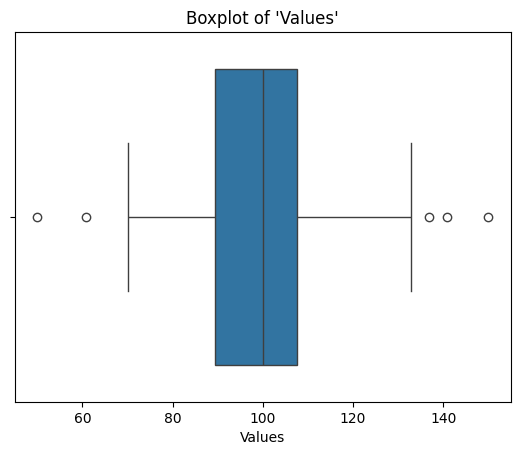

In [3]:
# Vykreslení boxplotu pomocí knihovny Seaborn
# Boxplot (krabicový graf) vizualizuje rozdělení dat a umožňuje identifikovat odlehlé hodnoty.
ax = sns.boxplot(data=df, x='Values')

# Nastavení názvu grafu
ax.set(title="Boxplot of 'Values'")

## IQR: interkvartilové rozpětí

- Q1 a Q3 představují hodnoty 25. a 75. percentilu (kvartily).
- IQR (interkvartilové rozpětí) je rozsah, ve kterém se nachází střední 50 % dat.
- Dolní hranice je stanovena jako Q1 - 1.5 * IQR, hodnoty pod touto hranicí jsou považovány za outliers.
- Horní hranice je Q3 + 1.5 * IQR, hodnoty nad touto hranicí jsou také outliers.
- Filtrace pomocí podmínky vybere řádky, které jsou buď pod dolní nebo nad horní hranicí, což jsou naše outliers.

In [18]:
# Identifikace outliers pomocí IQR
# Nejprve spočítáme první kvartil (Q1) - to je hodnota, pod kterou spadá 25 % dat
Q1 = df['Values'].quantile(0.25)

# Dále spočítáme třetí kvartil (Q3) - to je hodnota, pod kterou spadá 75 % dat
Q3 = df['Values'].quantile(0.75)

# Interkvartilové rozpětí (IQR) je rozdíl mezi třetím a prvním kvartilem
IQR = Q3 - Q1

# Nyní spočítáme dolní a horní hranici pro identifikaci outliers:
# Hodnoty menší než dolní hranice a větší než horní hranice budou považovány za odlehlé hodnoty.
lower_bound = Q1 - 1.5 * IQR  # Dolní hranice
upper_bound = Q3 + 1.5 * IQR  # Horní hranice

# Filtrací získáme pouze outlier řádky
# Vybíráme řádky, kde hodnota je buď menší než dolní hranice nebo větší než horní hranice
outliers = df[(df['Values'] < lower_bound) | (df['Values'] > upper_bound)]

# Výpis outlier řádků
outliers

,Values
74,60.703823
113,136.948632
179,140.802537
200,50.000000
201,150.000000


<Figure size 1200x600 with 0 Axes>

## Čištění dat

Tento krok odstraní odlehlé hodnoty (outliers) a ponechá pouze ty řádky,kde hodnota spadá do rozsahu mezi dolní a horní hranicí.
Používáme logickou podmínku:
- `(df['Values'] >= lower_bound)` - vybere všechny řádky, kde hodnota není menší než dolní hranice.
- `(df['Values'] <= upper_bound)` - vybere všechny řádky, kde hodnota není větší než horní hranice.

Použitím logického operátoru `&` (AND) se vyberou pouze řádky, které splňují obě podmínky, tzn. hodnoty spadající do rozsahu mezi dolní a horní hranicí (nejsou to outliers).

In [5]:
df_cleaned = df[(df['Values'] >= lower_bound) & (df['Values'] <= upper_bound)]

df_cleaned = df[(df['Values'] >= lower_bound) & (df['Values'] <= upper_bound)]
df_cleaned

,Values
0,107.450712
1,97.926035
2,109.715328
3,122.845448
4,96.487699
...,...
195,105.779761
196,86.742138
197,102.305877
198,100.873131


[Text(0.5, 1.0, "Boxplot of 'Values'")]

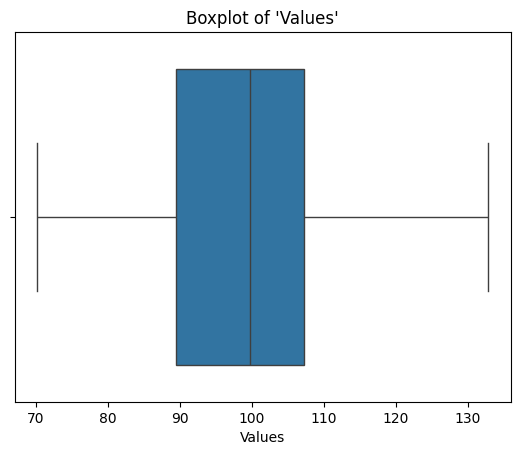

In [6]:
ax = sns.boxplot(data=df_cleaned, x='Values')
ax.set(title="Boxplot of 'Values'")

### Boxplot včetně zobrazení hodnot

Text(132.85683438714966, 0.07, 'Max: 132.86')

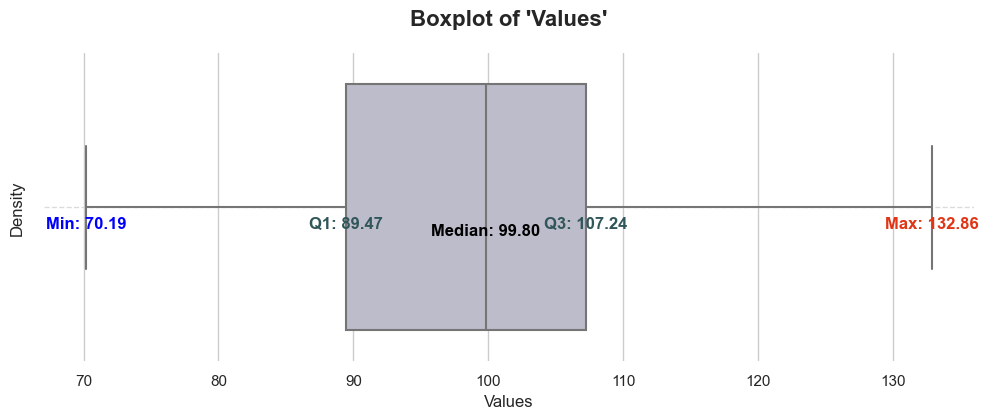

In [30]:
plt.figure(figsize=(12, 4))

# Styl 'whitegrid' přidává jemnou mřížku na pozadí grafu, což zlepšuje čitelnost
sns.set(style="whitegrid")

# Vytvoření boxplotu s šedou barvou a tloušťkou čar
# Tloušťka čar (linewidth=2.5) dává boxplotu výraznější vzhled
ax = sns.boxplot(data=df_cleaned, x='Values', color="#BABACC", linewidth=1.5)

# Nastavení názvu a dalších prvků formátování grafu
# Parametry: název grafu, popis os, velikost písma a tučnost textu pro lepší čitelnost
ax.set(title="Boxplot of 'Values'", xlabel="Values", ylabel="Density")
ax.set_title("Boxplot of 'Values'", fontsize=16, weight='bold',
             pad=20)  # Název s větším tučným písmem

# Úprava mřížky a odstranění horních a pravých hranic grafu pro čistší vzhled
# Použití přerušované čáry na ose y, čímž zůstane graf jemný a přehledný
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)  # Odstranění nepotřebných okrajů

# Výpočet statistických hodnot pro přidání popisků
Q1 = df_cleaned['Values'].quantile(0.25)
Q3 = df_cleaned['Values'].quantile(0.75)
median = df_cleaned['Values'].median()
min_value = df_cleaned['Values'].min()
max_value = df_cleaned['Values'].max()

# Přidání popisků k důležitým statistickým hodnotám
# Používáme textové popisky (ax.text) pro klíčové body: minimum, Q1, medián, Q3, maximum
# Popisky jsou barevně odlišeny a umístěny těsně nad osou x pro snadnou identifikaci
ax.text(min_value, 0.07, f'Min: {min_value:.2f}',
        ha='center', color='blue', fontsize=12, weight='bold')
ax.text(Q1, 0.07, f'Q1: {Q1:.2f}', ha='center',
        color='#315659', fontsize=12, weight='bold')
ax.text(median, 0.09, f'Median: { median:.2f}', ha='center', color='black', fontsize=12, weight='bold')
ax.text(Q3, 0.07, f'Q3: {Q3:.2f}', ha='center',
        color='#315659', fontsize=12, weight='bold')
ax.text(max_value, 0.07, f'Max: {max_value:.2f}', ha='center', color='#E03616', fontsize=12, weight='bold')